In [10]:
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
import seaborn as sns
data = fetch_california_housing(as_frame=True)

In [11]:
data.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


array([[<Axes: title={'center': 'MedInc'}>,
        <Axes: title={'center': 'HouseAge'}>,
        <Axes: title={'center': 'AveRooms'}>],
       [<Axes: title={'center': 'AveBedrms'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'AveOccup'}>],
       [<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>, <Axes: >]], dtype=object)

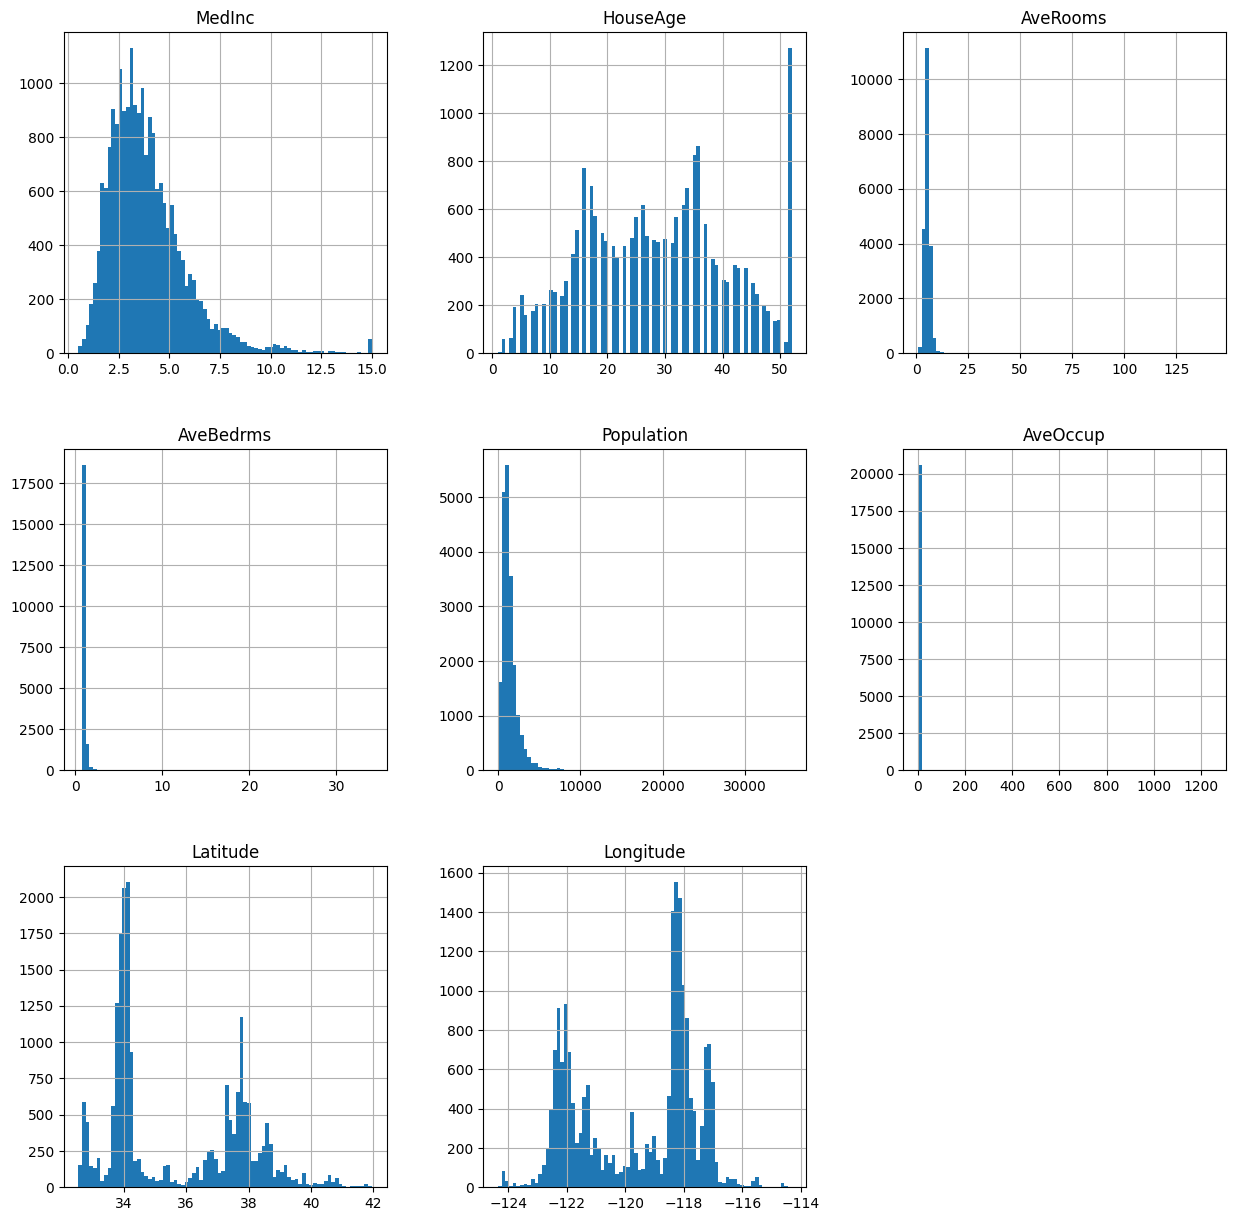

In [12]:
data.data.hist(bins=80, figsize=(15, 15))


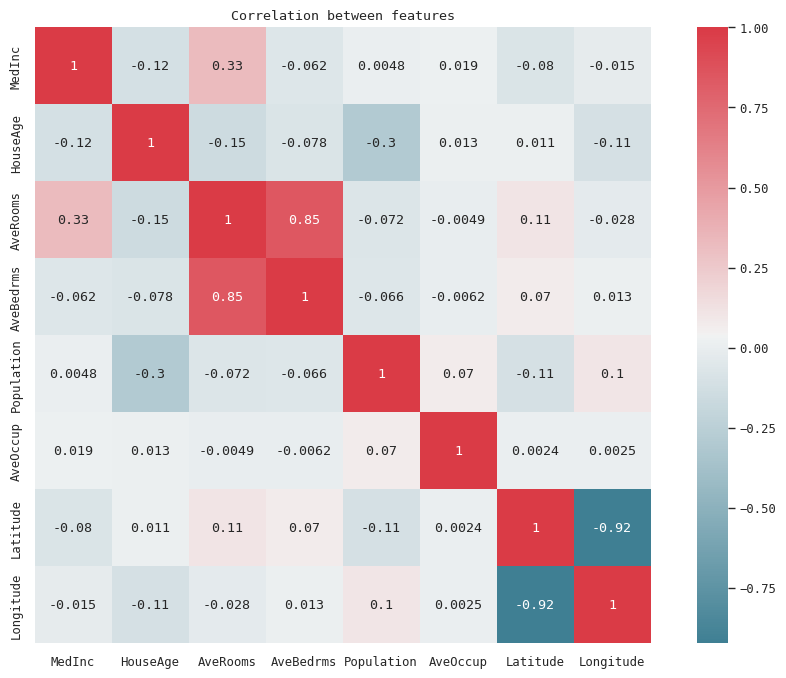

In [14]:
sns.set(context="paper",font="monospace")
housing_corr_matrix = data.data.corr()
#set the matplotlib figure
fig, axe = plt.subplots(figsize=(12,8))
#Generate color palettes 
cmap = sns.diverging_palette(220,10,center = "light", as_cmap=True)
#draw the heatmap
plt.title("Correlation between features")
sns.heatmap(housing_corr_matrix,vmax=1,square =True, cmap=cmap,annot=True );


In [16]:
import folium # Visualization Map
from folium.plugins import HeatMap # Visualization Map
from mpl_toolkits.basemap import Basemap # Visualization Map

Text(0.5, 35.91666666666665, 'latitude')

<Figure size 1500x1000 with 0 Axes>

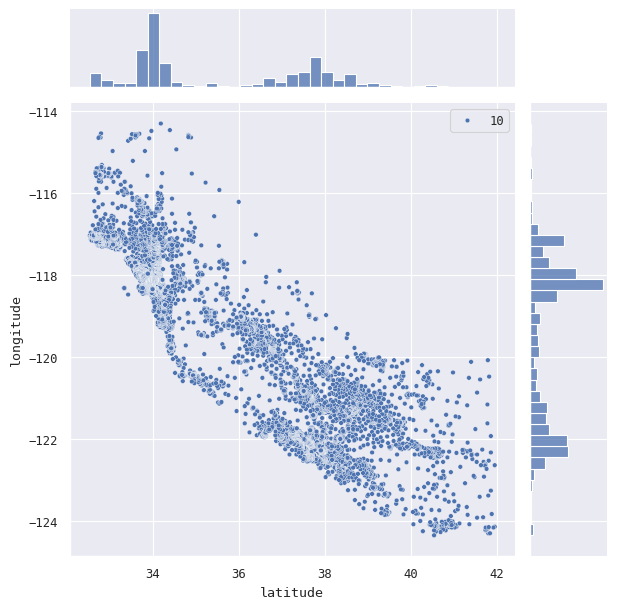

In [18]:
# Join Geographical Chart and histogram to show population density
plt.figure(figsize=(15,10))
sns.jointplot(x=data.data.Latitude.values,y=data.data.Longitude.values,size=10)
plt.ylabel("longitude")
plt.xlabel("latitude")

Text(0.5, 1.0, 'Geographical chart Shows Median House Value')

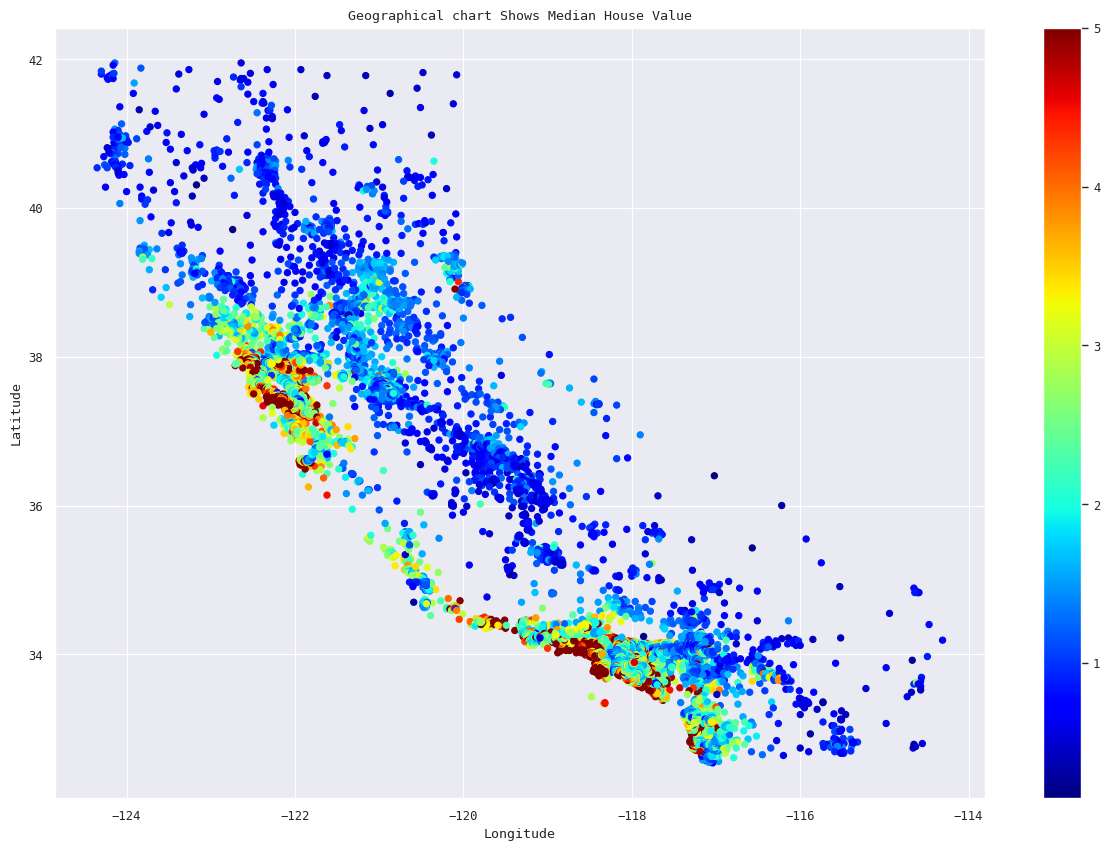

In [22]:
# Geographical Chart shows median house value
data.data.plot(kind="scatter", x='Longitude', y='Latitude', figsize=(15, 10),
           c=data.target, cmap=plt.get_cmap("jet"), colorbar=True, )
plt.title("Geographical chart Shows Median House Value")

In [24]:
# Live Heatmap to show California state
map = folium.Map(location=[36.7783,-119.4179],
                    zoom_start = 6, min_zoom=5) 

df = data.data[['Latitude', 'Longitude']]
data = [[row['Latitude'],row['Longitude']] for index, row in df.iterrows()]
HeatMap(data, radius=10).add_to(map)
map